<a href="https://colab.research.google.com/github/savinkova-mariia/NLP/blob/main/NLP_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# All Imports

In [33]:
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import re
from nltk import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download("wordnet")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [34]:
df=pd.read_csv('/content/drive/MyDrive/NLP/reviews.tsv', sep='\t')

# Data Cleaning

*Removing:*

*   reviews with 0 rating
*   null values

In [35]:
df = df.drop(df[(df["rating"] == 0.0)].index)

df.dropna(inplace=True)

*Data Cleaning*

In [36]:
lemmatizer = WordNetLemmatizer()

In [37]:
stop_words = set(stopwords.words("russian"))

In [38]:
def clean_reviews(review):

    # removing extra spaces
    review = re.sub(" +", " ", review)
    # make the lettes in lower case
    review = review.lower()
    # lemmatizating the words
    review = [lemmatizer.lemmatize(token) for token in word_tokenize(review)]
    # removing the stop words
    review = [word for word in review if not word in stop_words]
    # removing the all single letter words
    review = [i for i in review if len(i)>1]
    # join the text into the string
    review = " ".join(review)

    return review

In [39]:
df['review_text'] = df['review_text'].apply(clean_reviews)
df

,permalink,rating,review_text
0,1000095379,4.0,вкусная питца естт летнее кафе доставка приемл...
1,1000095379,1.0,думал днём детьми посидеть открытой площадке т...
2,1000095379,4.0,веранда вкусная пицца делают половине паковка ...
3,1000095379,1.0,второй забивают заказ
4,1000095379,5.0,любимая пиццерия
...,...,...,...
328640,245591834558,5.0,очень вкусная пицца
328641,245591834558,5.0,лучший борщ роза хутор большая порция теплый х...
328642,245591834558,5.0,понравилось пицца норм
328643,245591834558,1.0,обслуживание нормальное соотношение цена/качес...


# Data Proccesing

*Vectorization (importance estimation of the word in the
dataset)*

In [40]:
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1,2))
tfidf.fit(df['review_text'])

X = tfidf.transform(df['review_text'])
y = df['rating']

*Spliting dataset into train & test sets*

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Building Model

In [42]:
clf = LogisticRegression(random_state=123).fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [43]:
confusion_matrix(y_test, y_pred)

array([[ 2520,    34,   440,   154,  1157],
       [  842,    35,   420,   155,   796],
       [  681,    36,   862,   636,  1827],
       [  267,    10,   489,  1550,  5249],
       [  353,     4,   306,   874, 45977]])

In [44]:
accuracy_score(y_test, y_pred)

0.7757103267655389

Confusion matrix, without normalization
[[ 2520    34   440   154  1157]
 [  842    35   420   155   796]
 [  681    36   862   636  1827]
 [  267    10   489  1550  5249]
 [  353     4   306   874 45977]]
Normalized confusion matrix
[[5.85365854e-01 7.89779326e-03 1.02206736e-01 3.57723577e-02
  2.68757259e-01]
 [3.74555160e-01 1.55693950e-02 1.86832740e-01 6.89501779e-02
  3.54092527e-01]
 [1.68480950e-01 8.90648194e-03 2.13260762e-01 1.57347848e-01
  4.52003958e-01]
 [3.52941176e-02 1.32187707e-03 6.46397885e-02 2.04890945e-01
  6.93853272e-01]
 [7.42938923e-03 8.41857137e-05 6.44020710e-03 1.83945784e-02
  9.67651640e-01]]


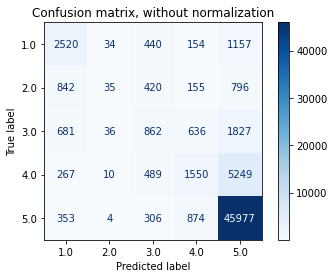

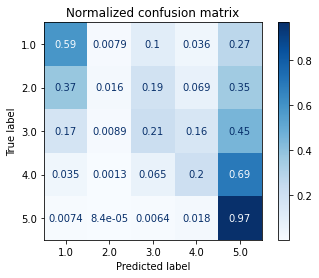

In [45]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()